In [ ]:
import pandas as pd

In [ ]:
df_fhv = pd.read_pickle("./hvhfv_merged.pkl")

In [ ]:
df_fhv.head()

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_time,trip_fair
0,Uber,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,664,23.03
1,Uber,2022-01-01 00:22:32,2022-01-01 00:30:12,237,161,460,12.32
2,Uber,2022-01-01 00:57:37,2022-01-01 01:07:32,237,161,595,23.30
3,Uber,2022-01-01 00:18:02,2022-01-01 00:23:05,262,229,303,6.30
4,Uber,2022-01-01 00:28:01,2022-01-01 00:35:42,229,141,461,7.44


In [ ]:
df_fhv.hvfhs_license_num.unique()

array(['Uber', 'Lyft'], dtype=object)

In [ ]:
len(df_fhv)

212416083

In [ ]:
df_lookups = pd.read_csv("./lookups.csv")

In [ ]:
df_lookups.head()

,LocationID,Borough,Zone,service_zone,Corrresponding Transit District
0,1,EWR,Newark Airport,EWR,NaN
1,2,Queens,Jamaica Bay,Boro Zone,NaN
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,12.0
3,4,Manhattan,Alphabet City,Yellow Zone,4.0
4,5,Staten Island,Arden Heights,Boro Zone,NaN


In [ ]:
borough_loc_dict = dict()
borough_dist_dict = dict()
df_lookups['Corrresponding Transit District ']

0       NaN
1       NaN
2      12.0
3       4.0
4       NaN
       ... 
260     2.0
261     4.0
262     4.0
263     NaN
264     NaN
Name: Corrresponding Transit District , Length: 265, dtype: float64

In [ ]:
# df_lookup[df_lookup['Borough']=='Queens']['LocationID'].unique()
boroughs = df_lookups['Borough'].unique()
for borough in boroughs:
    borough_loc_dict[borough] = df_lookups[df_lookups['Borough']==borough]['LocationID'].unique().tolist()
districts = df_lookups['Corrresponding Transit District '].unique()
for dist in districts:
    borough_dist_dict[dist] = df_lookups[df_lookups['Corrresponding Transit District ']==dist]['LocationID'].unique().tolist()

In [ ]:
borough_loc_dict

{'EWR': [1],
 'Queens': [2,
  7,
  8,
  9,
  10,
  15,
  16,
  19,
  27,
  28,
  30,
  38,
  53,
  56,
  57,
  64,
  70,
  73,
  82,
  83,
  86,
  92,
  93,
  95,
  96,
  98,
  101,
  102,
  117,
  121,
  122,
  124,
  129,
  130,
  131,
  132,
  134,
  135,
  138,
  139,
  145,
  146,
  157,
  160,
  171,
  173,
  175,
  179,
  180,
  191,
  192,
  193,
  196,
  197,
  198,
  201,
  203,
  205,
  207,
  215,
  216,
  218,
  219,
  223,
  226,
  252,
  253,
  258,
  260],
 'Bronx': [3,
  18,
  20,
  31,
  32,
  46,
  47,
  51,
  58,
  59,
  60,
  69,
  78,
  81,
  94,
  119,
  126,
  136,
  147,
  159,
  167,
  168,
  169,
  174,
  182,
  183,
  184,
  185,
  199,
  200,
  208,
  212,
  213,
  220,
  235,
  240,
  241,
  242,
  247,
  248,
  250,
  254,
  259],
 'Manhattan': [4,
  12,
  13,
  24,
  41,
  42,
  43,
  45,
  48,
  50,
  68,
  74,
  75,
  79,
  87,
  88,
  90,
  100,
  103,
  104,
  105,
  107,
  113,
  114,
  116,
  120,
  125,
  127,
  128,
  137,
  140,
  141,
  142,
  

In [ ]:
df_fhv

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_time,trip_fair
0,Uber,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,664,23.03
1,Uber,2022-01-01 00:22:32,2022-01-01 00:30:12,237,161,460,12.32
2,Uber,2022-01-01 00:57:37,2022-01-01 01:07:32,237,161,595,23.30
3,Uber,2022-01-01 00:18:02,2022-01-01 00:23:05,262,229,303,6.30
4,Uber,2022-01-01 00:28:01,2022-01-01 00:35:42,229,141,461,7.44
...,...,...,...,...,...,...,...
212416078,Uber,2022-12-31 23:52:44,2023-01-01 00:03:40,16,175,656,8.90
212416079,Uber,2022-12-31 23:02:33,2022-12-31 23:12:21,114,249,588,16.92
212416080,Uber,2022-12-31 23:19:31,2022-12-31 23:51:50,249,48,1939,32.25
212416081,Uber,2022-12-31 23:16:55,2022-12-31 23:36:57,42,147,1202,21.93


In [ ]:
def classify_locations(id_value):
    for class_name, id_list in borough_loc_dict.items():
        if id_value in id_list:
            return class_name
    return None
def classify_district(id_value):
    for class_name, id_list in borough_dist_dict.items():
        if id_value in id_list:
            return class_name
    return None

In [ ]:
df_fhv["PUBorough"] = df_fhv['PULocationID'].apply(classify_locations)

In [ ]:
df_fhv["PUDistrict"] = df_fhv['PULocationID'].apply(classify_district)

In [ ]:
df_fhv["DOBorough"] = df_fhv['DOLocationID'].apply(classify_locations)
df_fhv["DODistrict"] = df_fhv['DOLocationID'].apply(classify_district)

In [ ]:
pu_borough_fhv= df_fhv.groupby(['PUBorough'], as_index=False).size()
do_borough_fhv= df_fhv.groupby(['DOBorough'], as_index=False).size()

In [ ]:
pu_borough_fhv

,PUBorough,size
0,Bronx,24797734
1,Brooklyn,54874948
2,EWR,25
3,Manhattan,88031630
4,Queens,41897696
5,Staten Island,2803425
6,Unknown,10625


In [ ]:
do_borough_fhv

,DOBorough,size
0,Bronx,23541369
1,Brooklyn,54143716
2,EWR,1367109
3,Manhattan,80967388
4,Queens,40982171
5,Staten Island,2755107
6,Unknown,8659223


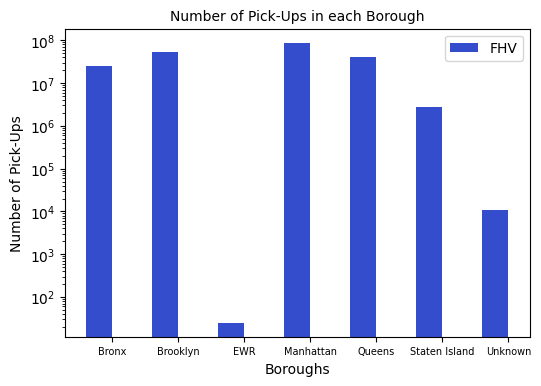

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming do_borough_yellow, pu_borough_yellow, and pu_borough_green are already defined

X = do_borough_fhv.DOBorough.unique().tolist()
fhv_pu_borough = pu_borough_fhv['size'].tolist()

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(6, 4))

blue_color = (0.2, # redness
                0.3, # greenness
                0.8, # blueness
                1.0 # transparency
                )
plt.bar(X_axis - 0.2, fhv_pu_borough, 0.4, label='FHV', color=blue_color)

plt.xticks(X_axis, X, fontsize=7)
plt.yscale('log')
plt.xlabel("Boroughs", fontsize=10)
plt.ylabel("Number of Pick-Ups", fontsize=10)
plt.title("Number of Pick-Ups in each Borough", fontsize=10)
plt.legend()
plt.show()

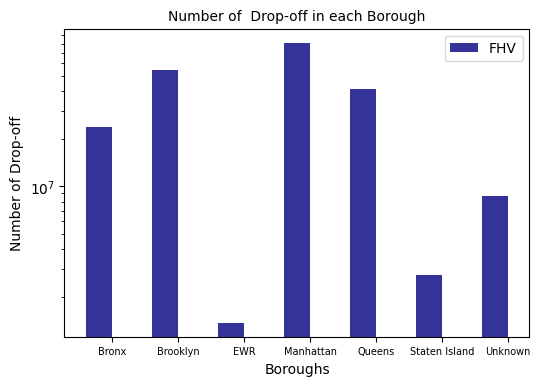

In [ ]:
X = do_borough_fhv.DOBorough.unique().tolist()
fhv_do_borough = do_borough_fhv['size'].tolist()

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(6, 4))

# Set the bar colors to green and yellow
blue_color = (0.2, # redness
                0.2, # greenness
                0.6, # blueness
                1.0 # transparency
                )
plt.bar(X_axis - 0.2, fhv_do_borough, 0.4, label='FHV', color=blue_color)

plt.xticks(X_axis, X, fontsize=7)
plt.yscale('log')
plt.xlabel("Boroughs", fontsize=10)
plt.ylabel("Number of Drop-off", fontsize=10)
plt.title("Number of  Drop-off in each Borough", fontsize=10)
plt.legend()
plt.show()

In [ ]:
pu_district_fhv = df_fhv.groupby(['PUDistrict'], as_index=False).size()

In [ ]:
pu_district_fhv

,PUDistrict,size
0,1.0,20654541
1,2.0,21976910
2,3.0,12706343
3,4.0,30676156
4,11.0,9948461
5,12.0,11629922
6,20.0,27511207
7,23.0,2664406
8,30.0,15581293
9,32.0,9598592


In [ ]:
do_district_fhv = df_fhv.groupby(['DODistrict'], as_index=False).size()

In [ ]:
do_district_fhv

,DODistrict,size
0,1.0,18987040
1,2.0,20174727
2,3.0,12210709
3,4.0,27663230
4,11.0,9515521
5,12.0,11032796
6,20.0,26502652
7,23.0,2331649
8,30.0,15365810
9,32.0,9400364


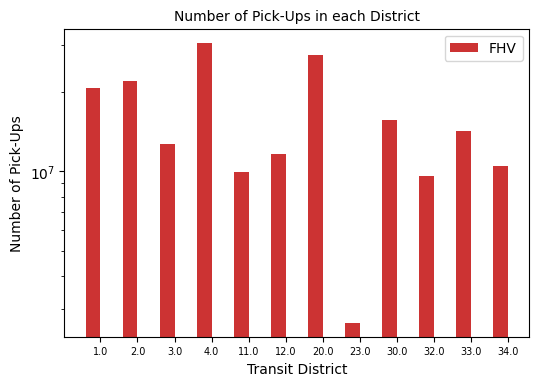

In [ ]:
X = do_district_fhv.DODistrict.unique().tolist()
fhv_pu_district = pu_district_fhv['size'].tolist()

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(6, 4))

# Set the bar colors to green and yellow
red_color = (0.8, # redness
                0.2, # greenness
                0.2, # blueness
                1.0 # transparency
                )
plt.bar(X_axis - 0.2, fhv_pu_district, 0.4, label='FHV', color=red_color)

plt.xticks(X_axis, X, fontsize=7)
plt.yscale('log')
plt.xlabel("Transit District", fontsize=10)
plt.ylabel("Number of Pick-Ups", fontsize=10)
plt.title("Number of Pick-Ups in each District", fontsize=10)
plt.legend()
plt.show()

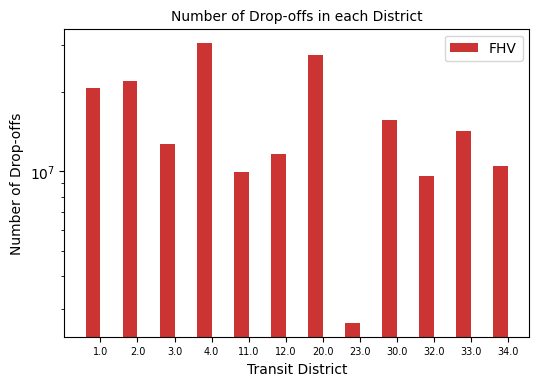

In [ ]:
X = do_district_fhv.DODistrict.unique().tolist()
fhv_do_district = do_district_fhv['size'].tolist()

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(6, 4))

# Set the bar colors to green and yellow
red_color = (0.8, # redness
                0.2, # greenness
                0.2, # blueness
                1.0 # transparency
                )
plt.bar(X_axis - 0.2, fhv_pu_district, 0.4, label='FHV', color=red_color)

plt.xticks(X_axis, X, fontsize=7)
plt.yscale('log')
plt.xlabel("Transit District", fontsize=10)
plt.ylabel("Number of Drop-offs", fontsize=10)
plt.title("Number of Drop-offs in each District", fontsize=10)
plt.legend()
plt.show()

In [ ]:
df_fhv["PUBorough"] = df_fhv['PULocationID'].apply(classify_locations)
df_fhv["PUDistrict"] = df_fhv['PULocationID'].apply(classify_district)

In [ ]:
df_fhv["DOBorough"] = df_fhv['DOLocationID'].apply(classify_locations)
df_fhv["DODistrict"] = df_fhv['DOLocationID'].apply(classify_district)

In [ ]:
df_fhv_pu_district = df_fhv[['PUDistrict']]
df_fhv_du_district = df_fhv[['DODistrict']]

In [ ]:
df_fhv

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_time,trip_fair,PUBorough,PUDistrict,DOBorough,DODistrict
0,Uber,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,664,23.03,Manhattan,4.0,Manhattan,1.0
1,Uber,2022-01-01 00:22:32,2022-01-01 00:30:12,237,161,460,12.32,Manhattan,4.0,Manhattan,1.0
2,Uber,2022-01-01 00:57:37,2022-01-01 01:07:32,237,161,595,23.30,Manhattan,4.0,Manhattan,1.0
3,Uber,2022-01-01 00:18:02,2022-01-01 00:23:05,262,229,303,6.30,Manhattan,4.0,Manhattan,4.0
4,Uber,2022-01-01 00:28:01,2022-01-01 00:35:42,229,141,461,7.44,Manhattan,4.0,Manhattan,4.0
...,...,...,...,...,...,...,...,...,...,...,...
212416078,Uber,2022-12-31 23:52:44,2023-01-01 00:03:40,16,175,656,8.90,Queens,NaN,Queens,NaN
212416079,Uber,2022-12-31 23:02:33,2022-12-31 23:12:21,114,249,588,16.92,Manhattan,2.0,Manhattan,2.0
212416080,Uber,2022-12-31 23:19:31,2022-12-31 23:51:50,249,48,1939,32.25,Manhattan,2.0,Manhattan,1.0
212416081,Uber,2022-12-31 23:16:55,2022-12-31 23:36:57,42,147,1202,21.93,Manhattan,3.0,Bronx,12.0


In [ ]:
df_fhv['puhour'] = df_fhv['pickup_datetime'].dt.hour
df_fhv['dohour'] = df_fhv['dropoff_datetime'].dt.hour
df_fhv['puday'] = df_fhv['pickup_datetime'].dt.day_name()
df_fhv['doday'] = df_fhv['dropoff_datetime'].dt.day_name()

In [ ]:
df_fhv.head()

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_time,trip_fair,PUBorough,PUDistrict,DOBorough,DODistrict,puhour,dohour,puday,doday
0,Uber,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,664,23.03,Manhattan,4.0,Manhattan,1.0,0,0,Saturday,Saturday
1,Uber,2022-01-01 00:22:32,2022-01-01 00:30:12,237,161,460,12.32,Manhattan,4.0,Manhattan,1.0,0,0,Saturday,Saturday
2,Uber,2022-01-01 00:57:37,2022-01-01 01:07:32,237,161,595,23.30,Manhattan,4.0,Manhattan,1.0,0,1,Saturday,Saturday
3,Uber,2022-01-01 00:18:02,2022-01-01 00:23:05,262,229,303,6.30,Manhattan,4.0,Manhattan,4.0,0,0,Saturday,Saturday
4,Uber,2022-01-01 00:28:01,2022-01-01 00:35:42,229,141,461,7.44,Manhattan,4.0,Manhattan,4.0,0,0,Saturday,Saturday


In [ ]:
df_fhv_time = df_fhv[['puhour','dohour','puday','doday']]
df_fhv_time

,puhour,dohour,puday,doday
0,0,0,Saturday,Saturday
1,0,0,Saturday,Saturday
2,0,1,Saturday,Saturday
3,0,0,Saturday,Saturday
4,0,0,Saturday,Saturday
...,...,...,...,...
212416078,23,0,Saturday,Sunday
212416079,23,23,Saturday,Saturday
212416080,23,23,Saturday,Saturday
212416081,23,23,Saturday,Saturday


In [ ]:
df_fhv_time_pu = df_fhv_time.groupby(['puhour','puday'], as_index=False).size()
df_fhv_time_do = df_fhv_time.groupby(['dohour','doday'], as_index=False).size()

In [ ]:
df_pivot_pu_fhv = df_fhv_time_pu.pivot(index='puhour', columns='puday', values='size')
df_pivot_do_fhv = df_fhv_time_do.pivot(index='dohour', columns='doday', values='size')

In [ ]:
df_pivot_pu_fhv

puday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
puhour,,,,,,,
0,1144220,864196,1841297,1951390,884197,696726,763350
1,742736,523190,1487205,1640728,525158,399612,438366
2,502213,350089,1167597,1234949,345660,262304,284673
3,374766,283720,882112,970773,278619,219000,232578
4,404833,348194,678170,740120,345855,296196,307081
5,546587,513175,536263,542817,522486,481890,492163
6,880210,836492,633233,576295,891992,852874,868486
7,1332504,1232372,775583,668964,1390860,1334634,1367308
8,1639025,1524163,971329,782603,1714590,1665986,1697432


In [ ]:
df_pivot_do_fhv

doday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
dohour,,,,,,,
0,1287659,971530,1950702,2081308,1024328,794793,887271
1,853745,603190,1606263,1763057,611837,465295,511139
2,561811,386443,1257604,1329157,385245,290314,315952
3,391498,286916,943717,1034964,279622,217672,231355
4,375929,314133,727866,799945,312386,261391,273165
5,487842,450394,550355,575620,452972,415145,422727
6,743956,707949,592778,552820,744521,707496,721029
7,1173629,1090945,737929,647615,1209546,1159484,1187495
8,1581249,1455476,908562,747944,1633394,1578949,1611636


In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx
import warnings
from shapely.geometry import shape
plt.style.use('ggplot')
warnings.filterwarnings("ignore")
import pandas as pd

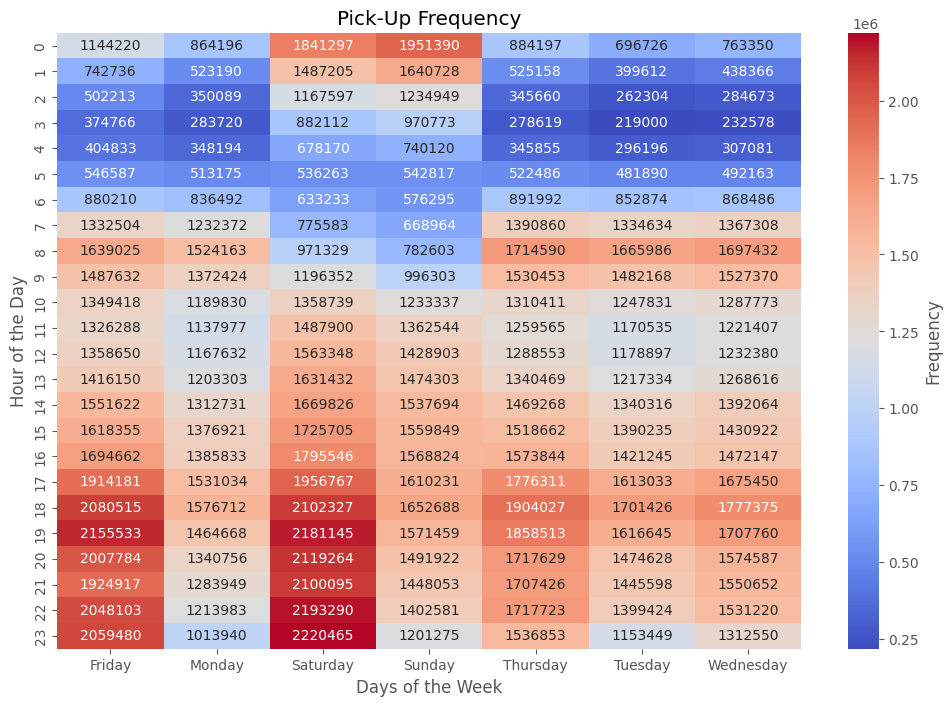

In [ ]:

hours = np.arange(24)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data = np.random.randint(0, 100, size=(24, 7))

df = df_pivot_pu_fhv

plt.figure(figsize=(12, 8))

sns.heatmap(df, annot=True, fmt='d', cmap="coolwarm", cbar_kws={'label': 'Frequency'})

plt.xlabel('Days of the Week')
plt.ylabel('Hour of the Day')
plt.title('Pick-Up Frequency')

plt.show()

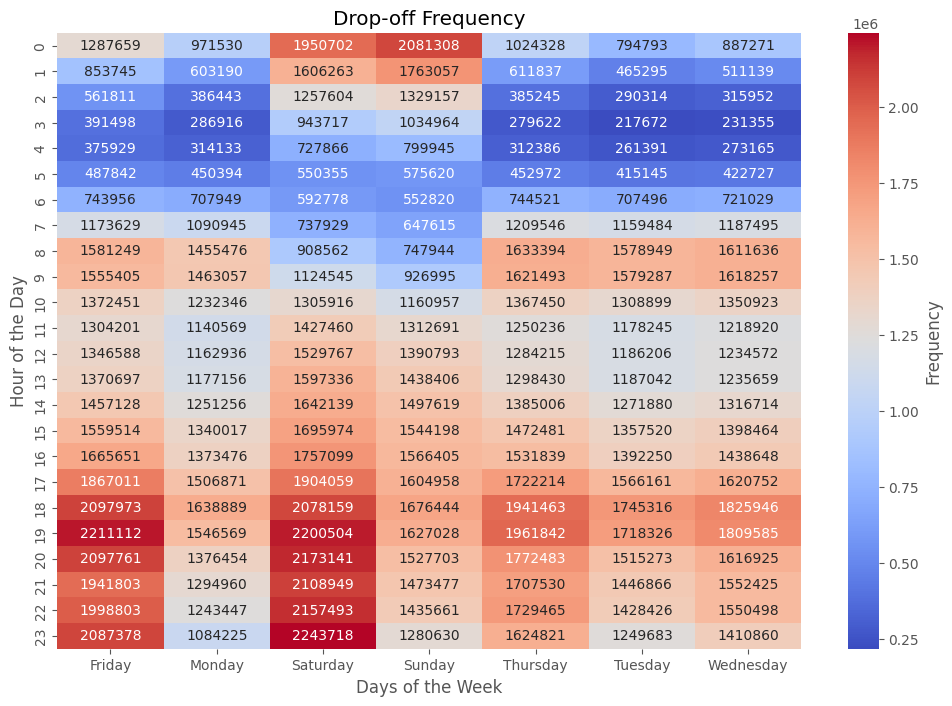

In [ ]:
hours = np.arange(24)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data = np.random.randint(0, 100, size=(24, 7))

df = df_pivot_do_fhv

plt.figure(figsize=(12, 8))

sns.heatmap(df, annot=True, fmt='d', cmap="coolwarm", cbar_kws={'label': 'Frequency'})

plt.xlabel('Days of the Week')
plt.ylabel('Hour of the Day')
plt.title('Drop-off Frequency')

plt.show()

In [ ]:
df_fhv

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_time,trip_fair,PUBorough,PUDistrict,DOBorough,DODistrict,puhour,dohour,puday,doday
0,Uber,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,664,23.03,Manhattan,4.0,Manhattan,1.0,0,0,Saturday,Saturday
1,Uber,2022-01-01 00:22:32,2022-01-01 00:30:12,237,161,460,12.32,Manhattan,4.0,Manhattan,1.0,0,0,Saturday,Saturday
2,Uber,2022-01-01 00:57:37,2022-01-01 01:07:32,237,161,595,23.30,Manhattan,4.0,Manhattan,1.0,0,1,Saturday,Saturday
3,Uber,2022-01-01 00:18:02,2022-01-01 00:23:05,262,229,303,6.30,Manhattan,4.0,Manhattan,4.0,0,0,Saturday,Saturday
4,Uber,2022-01-01 00:28:01,2022-01-01 00:35:42,229,141,461,7.44,Manhattan,4.0,Manhattan,4.0,0,0,Saturday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212416078,Uber,2022-12-31 23:52:44,2023-01-01 00:03:40,16,175,656,8.90,Queens,NaN,Queens,NaN,23,0,Saturday,Sunday
212416079,Uber,2022-12-31 23:02:33,2022-12-31 23:12:21,114,249,588,16.92,Manhattan,2.0,Manhattan,2.0,23,23,Saturday,Saturday
212416080,Uber,2022-12-31 23:19:31,2022-12-31 23:51:50,249,48,1939,32.25,Manhattan,2.0,Manhattan,1.0,23,23,Saturday,Saturday
212416081,Uber,2022-12-31 23:16:55,2022-12-31 23:36:57,42,147,1202,21.93,Manhattan,3.0,Bronx,12.0,23,23,Saturday,Saturday


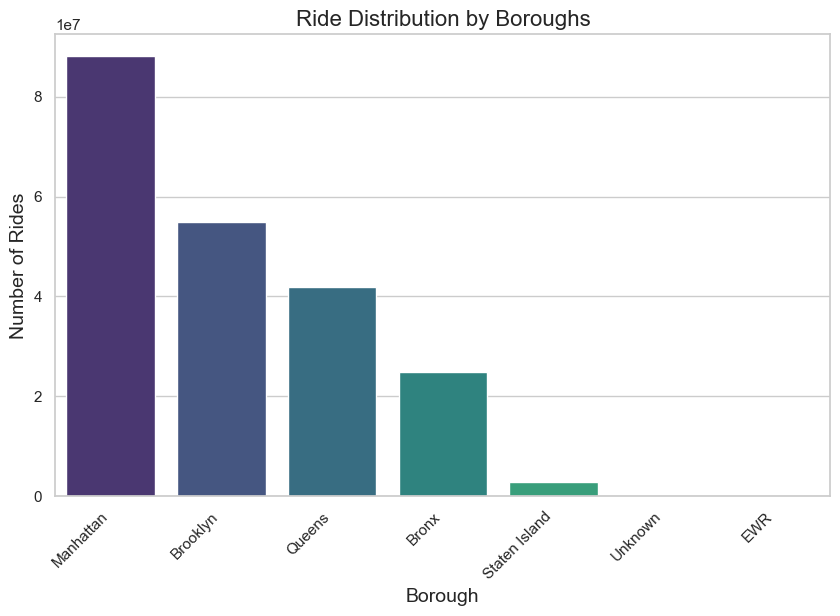

In [ ]:
#FHV Ride Distribution across the boroughs
sns.set(style="whitegrid", palette="pastel")


plt.figure(figsize=(10, 6))
borough_distribution = df_fhv['PUBorough'].value_counts()
sns.barplot(x=borough_distribution.index, y=borough_distribution.values, palette="viridis")

plt.title('Ride Distribution by Boroughs', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)

plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

In [ ]:
# sns.histplot(df_fhv['puhour'], bins=24, kde=True, color='blue', label='Pickup Hours')
# sns.histplot(df_fhv['dohour'], bins=24, kde=True, color='orange', label='Drop-off Hours')
# plt.title('Peak Hours Analysis')
# plt.legend()
# plt.show()

In [ ]:
import openpyxl
df_crime = pd.read_excel("./Transit District Crimes.xlsx")
df_crime = df_crime[['District','ASSAULT 3 & RELATED OFFENSES']]
df = df_crime

In [ ]:
df_crime

,District,ASSAULT 3 & RELATED OFFENSES
0,Transit District 01,170
1,Transit District 02,199
2,Transit District 03,161
3,Transit District 04,230
4,Transit District 11,93
5,Transit District 12,96
6,Transit District 20,169
7,Transit District 23,26
8,Transit District 30,105
9,Transit District 32,104


In [ ]:
pickup_list = df_fhv[['pickup_datetime', 'PULocationID', 'PUBorough', 'PUDistrict']]

In [ ]:
pickup_list

,pickup_datetime,PULocationID,PUBorough,PUDistrict
0,2022-01-01 00:07:24,170,Manhattan,4.0
1,2022-01-01 00:22:32,237,Manhattan,4.0
2,2022-01-01 00:57:37,237,Manhattan,4.0
3,2022-01-01 00:18:02,262,Manhattan,4.0
4,2022-01-01 00:28:01,229,Manhattan,4.0
...,...,...,...,...
212416078,2022-12-31 23:52:44,16,Queens,NaN
212416079,2022-12-31 23:02:33,114,Manhattan,2.0
212416080,2022-12-31 23:19:31,249,Manhattan,2.0
212416081,2022-12-31 23:16:55,42,Manhattan,3.0


In [ ]:
transit_districts = df_fhv['PUDistrict'].unique().tolist()


In [ ]:
transit_districts

[4.0, 2.0, 3.0, 20.0, 1.0, 34.0, nan, 33.0, 11.0, 12.0, 30.0, 32.0, 23.0]

In [ ]:
most_common_pickup_district = df_fhv['PUDistrict'].value_counts().idxmax()
total_pickups_most_common_district = df_fhv['PUDistrict'].value_counts().max()


In [ ]:
most_common_pickup_district

4.0

In [ ]:
total_pickups_most_common_district

30676156

In [ ]:
most_common_pickup_district = df_fhv['PUDistrict'].value_counts().idxmax()

# Find the district with the highest number of crimes in df_crime
district_with_highest_crimes = df_crime.loc[df_crime['ASSAULT 3 & RELATED OFFENSES'].idxmax(), 'District']

In [ ]:
most_common_pickup_district
district_with_highest_crimes

'Transit District 04'

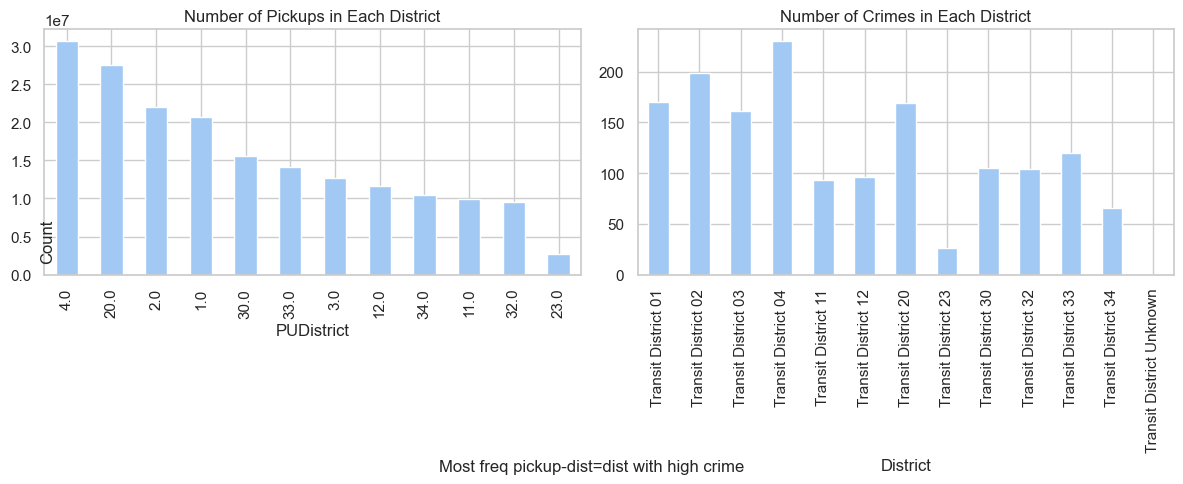

In [ ]:
#These plots give an overview of the pickups associated with high crime districts

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for df_fhv
df_fhv['PUDistrict'].value_counts().plot(kind='bar', ax=ax1, title='Number of Pickups in Each District')

# Plot for df_crime
df_crime.set_index('District')['ASSAULT 3 & RELATED OFFENSES'].plot(kind='bar', ax=ax2, title='Number of Crimes in Each District')

# Set common y-axis label
fig.text(0.5, 0.04, 'Most freq pickup-dist=dist with high crime', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_green = pd.read_pickle('./green_taxi_yearly.pkl')
df_yellow = pd.read_pickle('./yellow_taxi_yearly.pkl')

In [ ]:
df_green

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840397,2,2022-12-31 23:33:00,2022-12-31 23:49:00,None,NaN,33,79,NaN,3.53,20.72,0.00,0.0,4.89,0.0,None,1.0,29.36,NaN,NaN,NaN
840398,2,2022-12-31 23:29:00,2023-01-01 00:01:00,None,NaN,49,197,NaN,8.94,39.01,0.00,0.0,8.00,0.0,None,1.0,48.01,NaN,NaN,NaN
840399,2,2022-12-31 23:05:00,2022-12-31 23:12:00,None,NaN,54,181,NaN,1.27,12.11,0.00,0.0,2.62,0.0,None,1.0,15.73,NaN,NaN,NaN
840400,2,2022-12-31 23:03:00,2022-12-31 23:18:00,None,NaN,7,129,NaN,2.23,15.51,0.00,0.0,3.30,0.0,None,1.0,19.81,NaN,NaN,NaN


In [ ]:
df_yellow

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39656093,2,2022-12-31 23:46:00,2023-01-01 00:11:00,NaN,11.56,NaN,None,16,36,0,39.55,0.0,0.5,8.21,0.0,1.0,49.26,NaN,NaN
39656094,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,0,26.23,0.0,0.5,0.00,0.0,1.0,30.23,NaN,NaN
39656095,2,2022-12-31 23:00:49,2022-12-31 23:26:57,NaN,13.35,NaN,None,168,197,0,47.73,0.0,0.5,9.85,0.0,1.0,59.08,NaN,NaN
39656096,1,2022-12-31 23:02:50,2022-12-31 23:16:05,NaN,0.00,NaN,None,238,116,0,12.74,0.0,0.5,0.00,0.0,1.0,16.74,NaN,NaN


In [ ]:
df_green["PUBorough"] = df_green['PULocationID'].apply(classify_locations)
df_green["PUDistrict"] = df_green['PULocationID'].apply(classify_district)
df_green["DOBorough"] = df_green['DOLocationID'].apply(classify_locations)
df_green["DODistrict"] = df_green['DOLocationID'].apply(classify_district)

In [ ]:
df_yellow["PUBorough"] = df_yellow['PULocationID'].apply(classify_locations)
df_yellow["PUDistrict"] = df_yellow['PULocationID'].apply(classify_district)
df_yellow["DOBorough"] = df_yellow['DOLocationID'].apply(classify_locations)
df_yellow["DODistrict"] = df_yellow['DOLocationID'].apply(classify_district)

In [ ]:
pu_borough_green = df_green.groupby(['PUBorough'], as_index=False).size()
do_borough_green = df_green.groupby(['DOBorough'], as_index=False).size()

In [ ]:
pu_borough_yellow = df_yellow.groupby(['PUBorough'], as_index=False).size()
do_borough_yellow = df_yellow.groupby(['DOBorough'], as_index=False).size()

In [ ]:
pu_borough_green

,PUBorough,size
0,Bronx,26958
1,Brooklyn,133777
2,EWR,53
3,Manhattan,478355
4,Queens,197193
5,Staten Island,199
6,Unknown,3867


In [ ]:
do_borough_green

,DOBorough,size
0,Bronx,40261
1,Brooklyn,107956
2,EWR,697
3,Manhattan,484528
4,Queens,194106
5,Staten Island,230
6,Unknown,12624


In [ ]:
pu_borough_yellow

,PUBorough,size
0,Bronx,52181
1,Brooklyn,291184
2,EWR,10126
3,Manhattan,35281758
4,Queens,3453358
5,Staten Island,3233
6,Unknown,564258


In [ ]:
do_borough_yellow

,DOBorough,size
0,Bronx,249225
1,Brooklyn,1560943
2,EWR,114295
3,Manhattan,35026499
4,Queens,2262184
5,Staten Island,11238
6,Unknown,431714


In [ ]:
X = do_borough_yellow.DOBorough.unique().tolist()
green_pu_borough = pu_borough_yellow['size'].tolist()
yellow_pu_borough = pu_borough_green['size'].tolist()

In [ ]:
X = do_borough_yellow.DOBorough.unique().tolist()
green_do_borough = do_borough_yellow['size'].tolist()
yellow_do_borough = do_borough_green['size'].tolist()

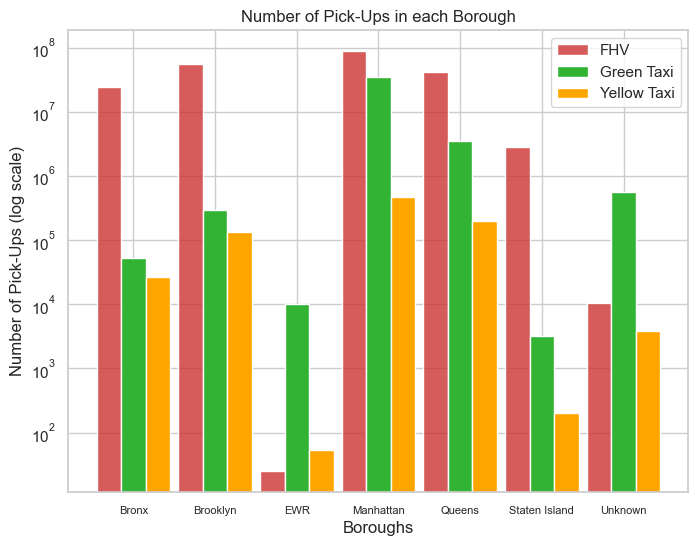

In [ ]:
fhv_pu_borough = pu_borough_fhv['size'].tolist()

# Assuming 'X' is the list of borough names
# Replace 'X' with your actual list of borough names

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the bar colors for FHV pickups
fhv_color = (0.8, 0.2, 0.2, 0.8)  # Adjust the color as needed

# Set the bar colors for green and yellow taxis
green_color = (0.2, 0.7, 0.2, 1.0)
yellow_color = (0.5, 0.0, 0.5, 0.6)

# Plot the bars for FHV, green, and yellow pickups
plt.bar(X_axis - 0.3, fhv_pu_borough, 0.3, label='FHV', color=fhv_color)
plt.bar(X_axis, green_pu_borough, 0.3, label='Green Taxi', color=green_color)
plt.bar(X_axis + 0.3, yellow_pu_borough, 0.3, label='Yellow Taxi', color='orange')

plt.xticks(X_axis, X, fontsize=8)
plt.yscale('log')
plt.xlabel("Boroughs", fontsize=12)
plt.ylabel("Number of Pick-Ups (log scale)", fontsize=12)
plt.title("Number of Pick-Ups in each Borough", fontsize=12)
plt.legend()
plt.show()

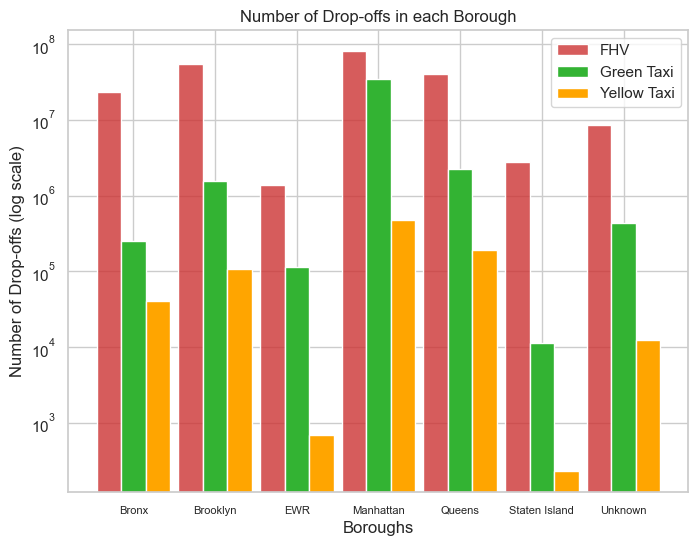

In [ ]:
fhv_do_borough = do_borough_fhv['size'].tolist()

# Assuming 'X' is the list of borough names
# Replace 'X' with your actual list of borough names

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the bar colors for FHV pickups
fhv_color = (0.8, 0.2, 0.2, 0.8)  # Adjust the color as needed

# Set the bar colors for green and yellow taxis
green_color = (0.2, 0.7, 0.2, 1.0)
yellow_color = (0.5, 0.0, 0.5, 0.6)

# Plot the bars for FHV, green, and yellow pickups
plt.bar(X_axis - 0.3, fhv_do_borough, 0.3, label='FHV', color=fhv_color)
plt.bar(X_axis, green_do_borough, 0.3, label='Green Taxi', color=green_color)
plt.bar(X_axis + 0.3, yellow_do_borough, 0.3, label='Yellow Taxi', color='orange')

plt.xticks(X_axis, X, fontsize=8)
plt.yscale('log')
plt.xlabel("Boroughs", fontsize=12)
plt.ylabel("Number of Drop-offs (log scale)", fontsize=12)
plt.title("Number of Drop-offs in each Borough", fontsize=12)
plt.legend()
plt.show()

In [ ]:
pu_district_green = df_green.groupby(['PUDistrict'], as_index=False).size()
do_district_green = df_green.groupby(['DODistrict'], as_index=False).size()
pu_district_yellow = df_yellow.groupby(['PUDistrict'], as_index=False).size()
do_district_yellow = df_yellow.groupby(['DODistrict'], as_index=False).size()

In [ ]:
pu_district_green

,PUDistrict,size
0,1.0,168905
1,2.0,337
2,3.0,301262
3,4.0,7569
4,11.0,12903
5,12.0,11572
6,20.0,191750
7,23.0,1662
8,30.0,88037
9,32.0,17833


In [ ]:
do_district_green

,DODistrict,size
0,1.0,115277
1,2.0,21764
2,3.0,222760
3,4.0,120268
4,11.0,18320
5,12.0,17106
6,20.0,149799
7,23.0,5059
8,30.0,52850
9,32.0,18500


In [ ]:
pu_district_yellow

,PUDistrict,size
0,1.0,10339293
1,2.0,7120361
2,3.0,2081644
3,4.0,15149561
4,11.0,20587
5,12.0,25917
6,20.0,405041
7,23.0,12424
8,30.0,153290
9,32.0,39546


In [ ]:
do_district_yellow

,DODistrict,size
0,1.0,9947778
1,2.0,6587483
2,3.0,3112269
3,4.0,14641111
4,11.0,91944
5,12.0,109451
6,20.0,1020920
7,23.0,62280
8,30.0,730816
9,32.0,201519


In [ ]:
X = do_district_yellow.DODistrict.unique().tolist()
green_pu_district = pu_district_yellow['size'].tolist()
yellow_pu_district = pu_district_green['size'].tolist()

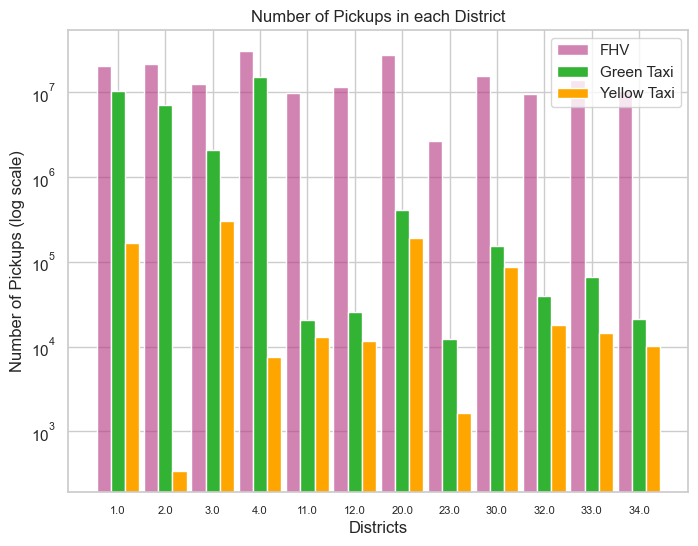

In [ ]:
fhv_pu_district = pu_district_fhv['size'].tolist()

# Assuming 'X' is the list of borough names
# Replace 'X' with your actual list of borough names

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the bar colors for FHV pickups
fhv_color = (0.7, 0.2, 0.5, 0.6)  # Adjust the color as needed

# Set the bar colors for green and yellow taxis
green_color = (0.2, 0.7, 0.2, 1.0)
yellow_color = (0.5, 0.0, 0.5, 0.6)

# Plot the bars for FHV, green, and yellow pickups
plt.bar(X_axis - 0.3, fhv_pu_district, 0.3, label='FHV', color=fhv_color)
plt.bar(X_axis, green_pu_district, 0.3, label='Green Taxi', color=green_color)
plt.bar(X_axis + 0.3, yellow_pu_district, 0.3, label='Yellow Taxi', color='orange')

plt.xticks(X_axis, X, fontsize=8)
plt.yscale('log')
plt.xlabel("Districts", fontsize=12)
plt.ylabel("Number of Pickups (log scale)", fontsize=12)
plt.title("Number of Pickups in each District", fontsize=12)
plt.legend()
plt.show()

In [ ]:
X = do_district_yellow.DODistrict.unique().tolist()
green_do_district = do_district_yellow['size'].tolist()
yellow_do_district = do_district_green['size'].tolist()

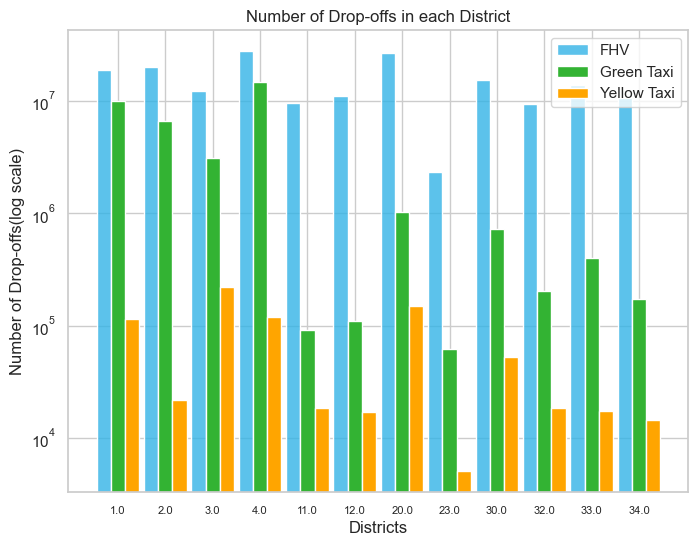

In [ ]:
fhv_do_district = do_district_fhv['size'].tolist()

# Assuming 'X' is the list of borough names
# Replace 'X' with your actual list of borough names

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the bar colors for FHV pickups
fhv_color = (0.2, 0.7, 0.9, 0.8)  # Adjust the color as needed

# Set the bar colors for green and yellow taxis
green_color = (0.2, 0.7, 0.2, 1.0)
yellow_color = (0.5, 0.0, 0.5, 0.6)

# Plot the bars for FHV, green, and yellow pickups
plt.bar(X_axis - 0.3, fhv_do_district, 0.3, label='FHV', color=fhv_color)
plt.bar(X_axis, green_do_district, 0.3, label='Green Taxi', color=green_color)
plt.bar(X_axis + 0.3, yellow_do_district, 0.3, label='Yellow Taxi', color='orange')

plt.xticks(X_axis, X, fontsize=8)
plt.yscale('log')
plt.xlabel("Districts", fontsize=12)
plt.ylabel("Number of Drop-offs(log scale)", fontsize=12)
plt.title("Number of Drop-offs in each District", fontsize=12)
plt.legend()
plt.show()

In [ ]:
trip_fhv_column = df_fhv['trip_fair']
fare_yellow_column = df_yellow['fare_amount']
fare_green_column = df_green['fare_amount']

# Creating a new dataframe by concatenating the columns
result_df = pd.concat([trip_fhv_column, fare_yellow_column, fare_green_column], axis=1)
result_df

,trip_fair,fare_amount,fare_amount
0,23.03,14.5,3.5
1,12.32,8.0,9.5
2,23.30,7.5,14.5
3,6.30,8.0,8.0
4,7.44,23.5,22.0
...,...,...,...
212416078,8.90,NaN,NaN
212416079,16.92,NaN,NaN
212416080,32.25,NaN,NaN
212416081,21.93,NaN,NaN


In [ ]:
result_df.columns = ['fhv_fares', 'yellow_taxi_fares', 'green_taxi_fares']
result_df

,fhv_fares,yellow_taxi_fares,green_taxi_fares
0,23.03,14.5,3.5
1,12.32,8.0,9.5
2,23.30,7.5,14.5
3,6.30,8.0,8.0
4,7.44,23.5,22.0
...,...,...,...
212416078,8.90,NaN,NaN
212416079,16.92,NaN,NaN
212416080,32.25,NaN,NaN
212416081,21.93,NaN,NaN


In [ ]:
result_df = result_df.fillna(result_df.mean())

In [ ]:
result_df

,fhv_fares,yellow_taxi_fares,green_taxi_fares
0,23.03,14.500000,3.500000
1,12.32,8.000000,9.500000
2,23.30,7.500000,14.500000
3,6.30,8.000000,8.000000
4,7.44,23.500000,22.000000
...,...,...,...
212416078,8.90,10.362822,15.294517
212416079,16.92,10.362822,15.294517
212416080,32.25,10.362822,15.294517
212416081,21.93,10.362822,15.294517


In [ ]:
average_fhv_fare = result_df['fhv_fares'].mean()
average_yellow_taxi_fare = result_df['yellow_taxi_fares'].mean()
average_green_taxi_fare = result_df['green_taxi_fares'].mean()

In [ ]:
average_fhv_fare

19.75789508772734

In [ ]:
average_yellow_taxi_fare

10.362821757445833

In [ ]:
average_green_taxi_fare

15.294517123951692

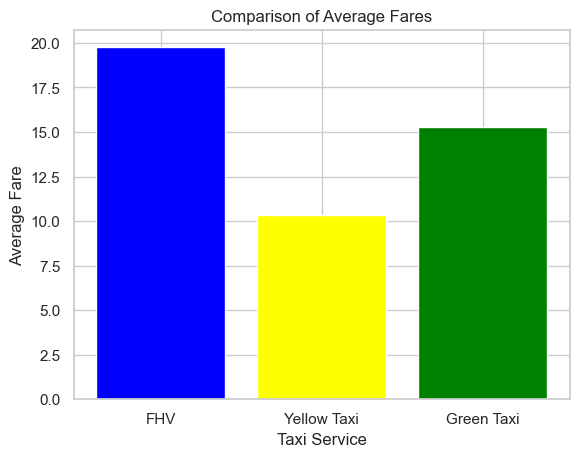

In [ ]:
categories = ['FHV', 'Yellow Taxi', 'Green Taxi']
average_fares = [average_fhv_fare, average_yellow_taxi_fare, average_green_taxi_fare]

plt.bar(categories, average_fares, color=['blue', 'yellow', 'green'])
plt.xlabel('Taxi Service')
plt.ylabel('Average Fare')
plt.title('Comparison of Average Fares')
plt.show()

In [ ]:
# seed_value = 42
# df_sample = df_fhv.sample(n=42000000, random_state=seed_value)
# df_sample